In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#Evaluvating
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,RocCurveDisplay,precision_score,recall_score,f1_score,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn.ensemble import VotingClassifier

In [4]:
from sklearn.svm import SVC

In [5]:
features=pd.read_csv('/content/drive/MyDrive/feature_true.csv')

In [6]:
features

,Pen Pressure,Line Spacing,Slant Angle,Baseline angle,Link,lable,l1,l2,l3,l4,l5,l6,l7,l8
0,52.868929,341.160000,5,0.000000,/content/drive/MyDrive/datad/Dysgraphia/dysgra...,yes,-1.326711,1.957117,-2.189485,-0.333610,-0.772707,6.519649,-1.192299,-2.409965
1,232.497760,618.666667,5,0.000000,/content/drive/MyDrive/datad/Dysgraphia/dysgra...,yes,-2.925126,12.627495,2.862629,-1.598852,-2.733752,-0.394925,-0.930737,15.862537
2,556.876165,105.000000,5,0.000000,/content/drive/MyDrive/datad/Dysgraphia/dysgra...,yes,-1.220980,3.149978,-2.085992,-0.608036,-0.816365,5.409840,-1.155585,-1.875372
3,286.433345,291.000000,5,70.179114,/content/drive/MyDrive/datad/Dysgraphia/dysgra...,yes,-2.975626,12.584564,3.098736,-1.628866,-2.881013,-0.444736,-0.890366,16.274555
4,291.363794,325.250000,5,29.786827,/content/drive/MyDrive/datad/Dysgraphia/dysgra...,yes,-2.836492,12.379585,2.961049,-1.570394,-2.695626,-0.432512,-0.912509,15.570055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,66.179395,1701.000000,-5,0.000000,/content/drive/MyDrive/datad/Normal/dysgraphia...,no,-1.357622,1.976934,-2.177062,-0.432225,-0.815048,6.553789,-1.237415,-2.422069
2261,38.100008,695.000000,-5,0.000000,/content/drive/MyDrive/datad/Normal/dysgraphia...,no,-1.089230,2.981813,-1.920207,-0.451657,-0.676257,5.305113,-1.070991,-1.736629
2262,321.598929,351.000000,5,0.000000,/content/drive/MyDrive/datad/Normal/dysgraphia...,no,-1.302217,2.535748,-2.056046,-0.428781,-0.662264,6.507058,-1.146004,-2.172775
2263,14.597426,899.000000,-5,0.000000,/content/drive/MyDrive/datad/Normal/dysgraphia...,no,-1.170443,2.707330,-2.003373,-0.415724,-0.684399,5.794947,-1.093134,-1.916457


In [7]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pen Pressure    2265 non-null   float64
 1   Line Spacing    2265 non-null   float64
 2   Slant Angle     2265 non-null   int64  
 3   Baseline angle  2265 non-null   float64
 4   Link            2265 non-null   object 
 5   lable           2265 non-null   object 
 6   l1              2265 non-null   float64
 7   l2              2265 non-null   float64
 8   l3              2265 non-null   float64
 9   l4              2265 non-null   float64
 10  l5              2265 non-null   float64
 11  l6              2265 non-null   float64
 12  l7              2265 non-null   float64
 13  l8              2265 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 247.9+ KB


In [8]:
labels=features['lable']
features.drop(['Link','lable'],axis=1,inplace=True)

In [9]:
features

,Pen Pressure,Line Spacing,Slant Angle,Baseline angle,l1,l2,l3,l4,l5,l6,l7,l8
0,52.868929,341.160000,5,0.000000,-1.326711,1.957117,-2.189485,-0.333610,-0.772707,6.519649,-1.192299,-2.409965
1,232.497760,618.666667,5,0.000000,-2.925126,12.627495,2.862629,-1.598852,-2.733752,-0.394925,-0.930737,15.862537
2,556.876165,105.000000,5,0.000000,-1.220980,3.149978,-2.085992,-0.608036,-0.816365,5.409840,-1.155585,-1.875372
3,286.433345,291.000000,5,70.179114,-2.975626,12.584564,3.098736,-1.628866,-2.881013,-0.444736,-0.890366,16.274555
4,291.363794,325.250000,5,29.786827,-2.836492,12.379585,2.961049,-1.570394,-2.695626,-0.432512,-0.912509,15.570055
...,...,...,...,...,...,...,...,...,...,...,...,...
2260,66.179395,1701.000000,-5,0.000000,-1.357622,1.976934,-2.177062,-0.432225,-0.815048,6.553789,-1.237415,-2.422069
2261,38.100008,695.000000,-5,0.000000,-1.089230,2.981813,-1.920207,-0.451657,-0.676257,5.305113,-1.070991,-1.736629
2262,321.598929,351.000000,5,0.000000,-1.302217,2.535748,-2.056046,-0.428781,-0.662264,6.507058,-1.146004,-2.172775
2263,14.597426,899.000000,-5,0.000000,-1.170443,2.707330,-2.003373,-0.415724,-0.684399,5.794947,-1.093134,-1.916457


[Text(0.5, 0, 'Pen Pressure'), Text(0, 0.5, 'Baseline angle')]

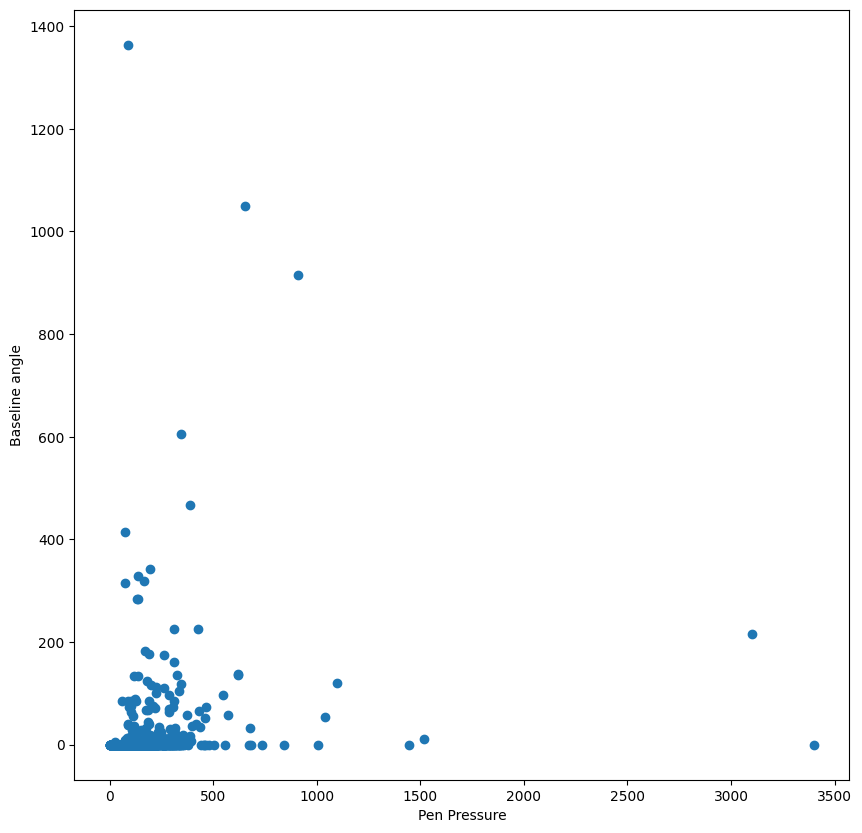

In [10]:
ig,ax=plt.subplots(figsize=(10,10))
mp=ax.scatter(features['Pen Pressure'],features['Baseline angle'])
#mp=ax.scatter(dk.age[dk.cp==0],dk.trestbps[dk.cp==0])
ax.legend
ax.set(xlabel="Pen Pressure",ylabel="Baseline angle")



[Text(0.5, 0, 'Slant angle'), Text(0, 0.5, 'Baseline angle')]

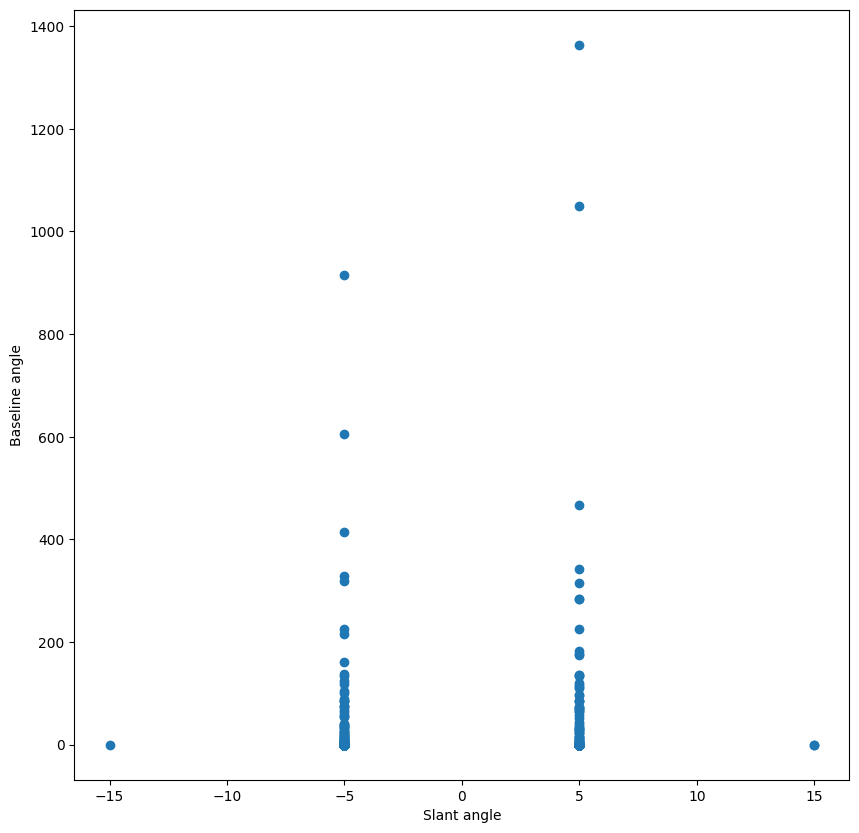

In [11]:
ig,ax=plt.subplots(figsize=(10,10))
mp=ax.scatter(features['Slant Angle'],features['Baseline angle'])

ax.legend
ax.set(xlabel="Slant angle",ylabel="Baseline angle")

In [12]:
features.corr()

,Pen Pressure,Line Spacing,Slant Angle,Baseline angle,l1,l2,l3,l4,l5,l6,l7,l8
Pen Pressure,1.000000,-0.089114,0.012006,0.224771,-0.389443,0.365536,0.413967,-0.374169,-0.432785,-0.235405,0.056669,0.434368
Line Spacing,-0.089114,1.000000,-0.060457,-0.036899,0.043943,0.001099,-0.039018,0.054212,0.077993,0.020027,0.019239,-0.032514
Slant Angle,0.012006,-0.060457,1.000000,0.019430,-0.075860,0.051851,0.058287,-0.078803,-0.082599,-0.043278,0.007662,0.058069
Baseline angle,0.224771,-0.036899,0.019430,1.000000,-0.246584,0.280441,0.320330,-0.276269,-0.314173,-0.216303,0.095679,0.333541
l1,-0.389443,0.043943,-0.075860,-0.246584,1.000000,-0.375159,-0.550181,0.452577,0.875877,0.059042,0.311047,-0.596915
l2,0.365536,0.001099,0.051851,0.280441,-0.375159,1.000000,0.945404,-0.943014,-0.650358,-0.917721,0.668330,0.927332
l3,0.413967,-0.039018,0.058287,0.320330,-0.550181,0.945404,1.000000,-0.928066,-0.819027,-0.821563,0.500889,0.990552
l4,-0.374169,0.054212,-0.078803,-0.276269,0.452577,-0.943014,-0.928066,1.000000,0.740400,0.860912,-0.551136,-0.914672
l5,-0.432785,0.077993,-0.082599,-0.314173,0.875877,-0.650358,-0.819027,0.740400,1.000000,0.411784,0.024382,-0.858742
l6,-0.235405,0.020027,-0.043278,-0.216303,0.059042,-0.917721,-0.821563,0.860912,0.411784,1.000000,-0.864208,-0.771701


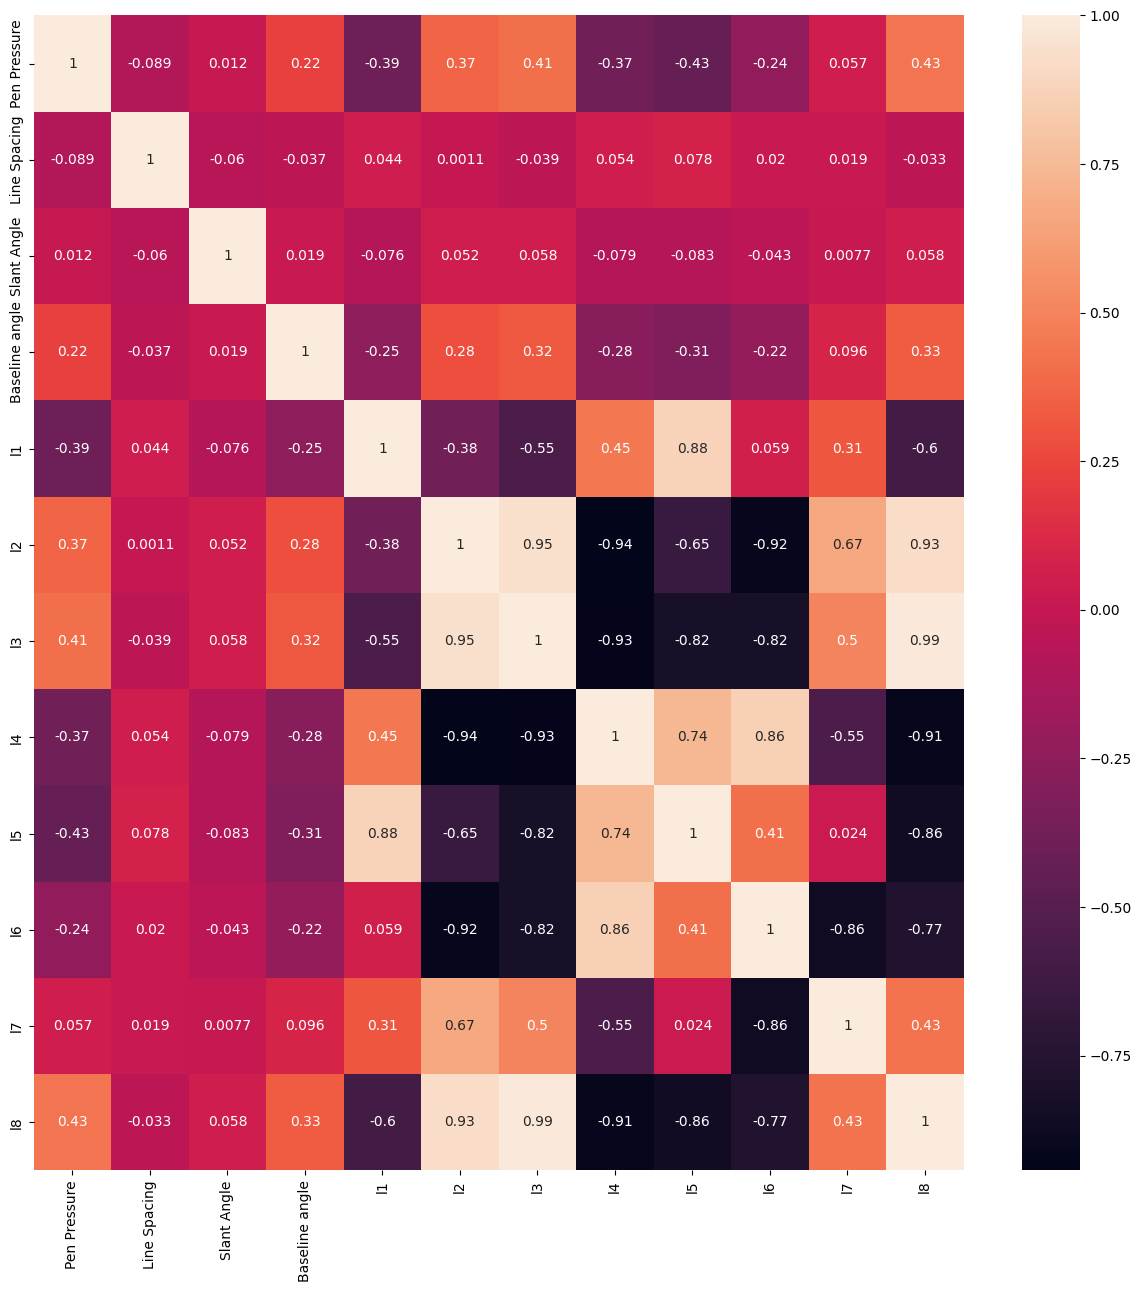

In [13]:
fig,ax=plt.subplots(figsize=(15,15))
ax=sns.heatmap(data=features.corr(),annot=True)

In [14]:
def mdlscr(model,x_tr,x_t,y_tr,y_t):
     model.fit(x_tr,y_tr)
     print(model.score(x_t,y_t))
     return model

In [15]:
ans={}
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(features,labels,train_size=0.9)
print("random forest classifier")
ans["RandomForestClassifier_all"]=mdlscr(RandomForestClassifier(),x_train,x_test,y_train,y_test)
print("Logistic Regression")
ans["LogisticRegression_all"]=mdlscr(LogisticRegression(max_iter=1000),x_train,x_test,y_train,y_test)
print("kNeighbour")
ans["kNeighbour_all"]=mdlscr(KNeighborsClassifier(),x_train,x_test,y_train,y_test)
print("Decision Tree")
ans["dtree_all"]=mdlscr(DecisionTreeClassifier(),x_train,x_test,y_train,y_test)

random forest classifier
0.9779735682819384
Logistic Regression
0.9779735682819384
kNeighbour
0.9779735682819384
Decision Tree
0.973568281938326


In [18]:
voting_classifier_hard = VotingClassifier(
    estimators = [('dtc',DecisionTreeClassifier()),
                  ('lr', LogisticRegression(max_iter=1000)),
                  ('rf',RandomForestClassifier() ),
                  ('Knb',KNeighborsClassifier() )
                  ],
    voting='hard')
voting_classifier_soft = VotingClassifier(
    estimators = [('dtc',DecisionTreeClassifier()),
                  ('lr', LogisticRegression(max_iter=1000)),
                  ('rf',RandomForestClassifier() ),
                  ('Knb',KNeighborsClassifier() )
                  ],
    voting='soft')

In [19]:
 voting_classifier_soft.fit(x_train,y_train)
 print(voting_classifier_soft.score(x_test,y_test))

0.9779735682819384


In [20]:
 voting_classifier_hard.fit(x_train,y_train)
 print(voting_classifier_soft.score(x_test,y_test))

0.9779735682819384


In [22]:
def evaluvate(model,x,y):
    y_predict=model.predict(x)
    print(classification_report(y,y_predict))
    ConfusionMatrixDisplay.from_predictions(y,y_predict)

              precision    recall  f1-score   support

          no       0.98      1.00      0.99       215
         yes       1.00      0.58      0.74        12

    accuracy                           0.98       227
   macro avg       0.99      0.79      0.86       227
weighted avg       0.98      0.98      0.98       227



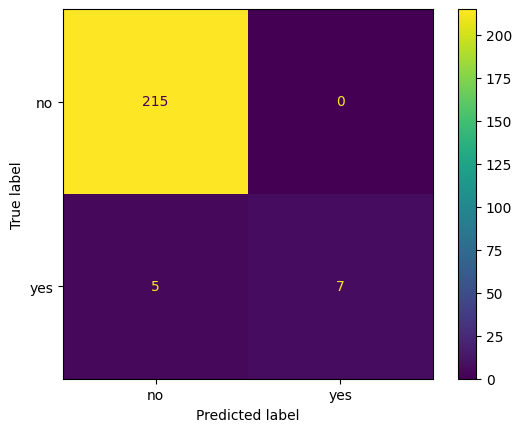

In [23]:
evaluvate(voting_classifier_soft,x_test,y_test)

              precision    recall  f1-score   support

          no       0.98      1.00      0.99       215
         yes       1.00      0.58      0.74        12

    accuracy                           0.98       227
   macro avg       0.99      0.79      0.86       227
weighted avg       0.98      0.98      0.98       227



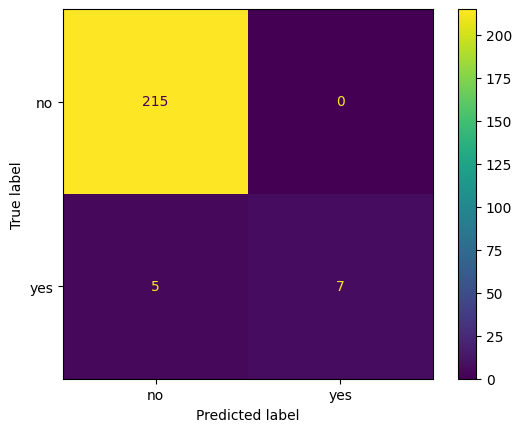

In [27]:
evaluvate(voting_classifier_hard,x_test,y_test)